In [1]:
import pandas as pd

# 1. Series 
'1차원' 데이터 실수, 정수, 문자열 등

In [2]:
# 객체
pd.Series

pandas.core.series.Series

In [3]:
# 함수 원형 및 사용방법
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool' = False, fastpath: 'bool' = False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Ser

In [4]:
# 단순 숫자 리스트 만들기
Digits = [1, 2, 3]

In [5]:
# Series로 변환
Digits_Series = pd.Series(Digits)

In [6]:
print('List 출력:', Digits)
print('Seires 출력:\r\n', Digits_Series)

List 출력: [1, 2, 3]
Seires 출력:
 0    1
1    2
2    3
dtype: int64


In [7]:
# 여러 타입이 혼용되는 리스트
Digits = ['1', 2, 3]

In [8]:
print(Digits)

['1', 2, 3]


In [9]:
Digits_Series = pd.Series(Digits)

In [10]:
# 여러 타입이 혼용된 리스트의 출력, '1' 이라고 표시되지 않음
# 주로 많이 나오는 실수들.

# csv 파일 안에 data frame으로 자동으로 읽었을 때, 동일한 type으로 변수를 읽는 경우가 종종 발생
print(Digits_Series)

0    1
1    2
2    3
dtype: object


In [11]:
print(type(Digits_Series[0]))
print(type(Digits_Series[1]))
print(type(Digits_Series[2]))

<class 'str'>
<class 'int'>
<class 'int'>


# 딕셔너리 데이터와 Series

In [12]:
dict_data = {'a':1,'b':2,'c':3}

In [13]:
dict_data['a']

1

In [14]:
# Error 발생
dict_data[a]

NameError: name 'a' is not defined

In [15]:
# dictionary 타입의 데이터로부터 series 객체 생성
series_data = pd.Series(dict_data)

In [16]:
print(series_data)

a    1
b    2
c    3
dtype: int64


In [17]:
print(series_data.index)
print(series_data.values)

Index(['a', 'b', 'c'], dtype='object')
[1 2 3]


In [18]:
series_data.index

Index(['a', 'b', 'c'], dtype='object')

In [19]:
series_data.values

array([1, 2, 3], dtype=int64)

In [20]:
series_data1 = pd.Series([1,2,3], index=['a', 'b', 'c'])

In [21]:
print(series_data)

a    1
b    2
c    3
dtype: int64


In [22]:
print(series_data1)

a    1
b    2
c    3
dtype: int64


# Series, 1차원 데이터에서 분석 사례

# 1. Categorical data (범주형 변수)

In [23]:
import random

In [24]:
random.sample

<bound method Random.sample of <random.Random object at 0x000001D9D5EAB4A0>>

In [25]:
help(random.sample)

Help on method sample in module random:

sample(population, k) method of random.Random instance
    Chooses k unique random elements from a population sequence or set.
    
    Returns a new list containing elements from the population while
    leaving the original population unchanged.  The resulting list is
    in selection order so that all sub-slices will also be valid random
    samples.  This allows raffle winners (the sample) to be partitioned
    into grand prize and second place winners (the subslices).
    
    Members of the population need not be hashable or unique.  If the
    population contains repeats, then each occurrence is a possible
    selection in the sample.
    
    To choose a sample in a range of integers, use range as an argument.
    This is especially fast and space efficient for sampling from a
    large population:   sample(range(10000000), 60)



https://www.google.com/search?q=python+random

In [26]:
random.sample( ['Female', 'Male'], 2)

['Male', 'Female']

In [27]:
# 주어진 list 이상의 선택 (중복해서 선택) 하는게 불가능.
random.sample( ['Female', 'Male'], 3)

ValueError: Sample larger than population or is negative

In [28]:
# 구글링: python random sample duplicate

https://www.google.com/search?q=python+random+sample+duplicate

In [29]:
# random choice는 duplicates 가능
Gender = random.choices(['Female', 'Male'], k=30)
print(Gender)

['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']


In [30]:
# Series로 변환 후 출력
Gender_SR = pd.Series(Gender)
print(Gender_SR)

0     Female
1       Male
2       Male
3       Male
4     Female
5       Male
6     Female
7     Female
8     Female
9       Male
10    Female
11      Male
12      Male
13      Male
14      Male
15      Male
16    Female
17    Female
18      Male
19      Male
20    Female
21      Male
22      Male
23    Female
24      Male
25    Female
26      Male
27    Female
28      Male
29    Female
dtype: object


In [31]:
# 명목형으로서 가능
Gender_SR.value_counts()

Male      17
Female    13
dtype: int64

# 범주형 변수는 주로 0 / 1 등으로 coding 되어있음

In [61]:
Gender = random.choices([0, 1], k=30)
print(Gender)

[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [64]:
Gender_SR = pd.Series(Gender)

In [67]:
Gender_SR.describe()

count    30.000000
mean      0.666667
std       0.479463
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
dtype: float64

In [73]:
# 중요
Gender_SR = Gender_SR.astype("category")

In [74]:
Gender_SR.describe()

count     30
unique     2
top        1
freq      20
dtype: int64

# Categorical data 범주형 변수 시각화

In [32]:
import seaborn

In [33]:
Gender_SR = pd.Series(
    random.choices(['Female', 'Male', 'Unknown'], k=50)
)

In [34]:
CountData = Gender_SR.value_counts()

In [35]:
CountData.index

Index(['Male', 'Unknown', 'Female'], dtype='object')

In [36]:
CountData.values

array([21, 17, 12], dtype=int64)

<AxesSubplot:>

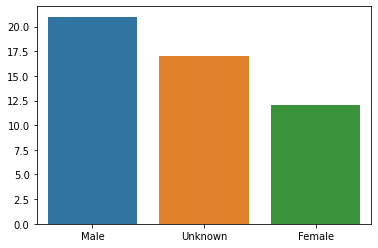

In [37]:
seaborn.barplot(x=CountData.index, y=CountData.values)

In [38]:
Gender_SR.value_counts()

Male       21
Unknown    17
Female     12
dtype: int64

## Y축 Proportion,으로 normalize

In [39]:
Gender_SR.value_counts(normalize=True)

Male       0.42
Unknown    0.34
Female     0.24
dtype: float64

In [40]:
Count_normalized = Gender_SR.value_counts(normalize=True)

In [41]:
Count_normalized.index

Index(['Male', 'Unknown', 'Female'], dtype='object')

<AxesSubplot:>

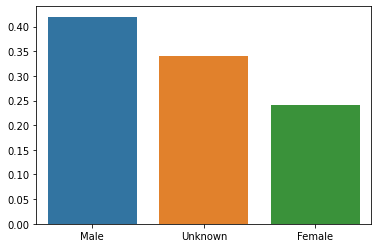

In [42]:
seaborn.barplot(x=Count_normalized.index, y=Count_normalized.values)

In [84]:
# Category type의 경우 자동으로 count plot 가능

In [75]:
Gender = random.choices([0, 1], k=30)
Gender_SR = pd.Series(Gender)
Gender_SR = Gender_SR.astype("category")

<AxesSubplot:ylabel='count'>

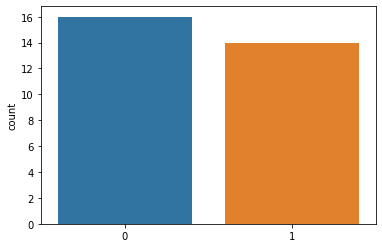

In [83]:
seaborn.countplot(data=Gender_SR, x=Gender_SR.index)

# 2. 연속형변수 및 시각화

In [43]:
import numpy as np

In [44]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution

https://www.google.com/search?q=python+generate+normal+distribution+data

In [45]:
Temperature = np.random.normal(30,3,100) # 평균, 표준편차, 개수

In [46]:
print(Temperature)

[27.59186898 27.17050948 29.37541493 30.82973128 31.91071012 29.13036313
 30.52243787 29.94302195 30.2518401  28.70222535 27.90563871 25.56830686
 29.16037487 29.05391993 30.78839775 31.00631449 31.42753584 30.83949777
 29.25830326 30.02526526 30.07209563 26.60351604 32.91564843 28.63030289
 31.16468515 36.86400578 29.45592625 26.63713293 30.54142496 33.67775777
 34.58817281 31.59245777 30.81348606 32.23041489 31.86087177 30.96799149
 31.23419545 25.3172901  37.76787917 27.65610748 29.08167303 27.81042948
 34.61764598 28.36796429 29.49830681 27.22373135 34.05211847 28.1779109
 39.5580962  35.9261171  25.72502096 33.29084644 33.21177618 33.19241408
 31.40679333 26.93109324 33.53693333 30.9600771  32.40731694 28.65489061
 28.02507353 26.98540334 28.5294069  27.67581889 32.82665015 26.58722752
 31.73787054 32.25811488 36.21490187 29.10027816 27.16568507 28.13305083
 28.92779285 28.6831173  30.27240477 27.91263463 27.26088882 25.19207203
 27.58474062 32.07071108 31.69618917 30.71666606 26.

In [47]:
pd.Series(Temperature)

0     27.591869
1     27.170509
2     29.375415
3     30.829731
4     31.910710
        ...    
95    28.440808
96    32.155271
97    35.346032
98    30.951007
99    32.707251
Length: 100, dtype: float64

In [48]:
Temperature_SR = pd.Series(Temperature)

In [49]:
# 최대값 index 출력
Temperature_SR.argmax()

48

In [50]:
# 최대값 출력
Temperature_SR[Temperature_SR.argmax()]

39.55809620014093

In [51]:
# 최소값 index 출력
Temperature_SR.argmin()

77

In [52]:
# 최소값 출력
Temperature_SR[Temperature_SR.argmin()]

25.192072030316847

In [53]:
Temperature_SR.argsort()

0     77
1     37
2     11
3     50
4     65
      ..
95    68
96    25
97    92
98    38
99    48
Length: 100, dtype: int64

Temperature_SR. 탭탭!

In [54]:
# 데이터 정렬
Temperature_SR[Temperature_SR.argsort()]

77    25.192072
37    25.317290
11    25.568307
50    25.725021
65    26.587228
        ...    
68    36.214902
25    36.864006
92    37.159359
38    37.767879
48    39.558096
Length: 100, dtype: float64

<AxesSubplot:>

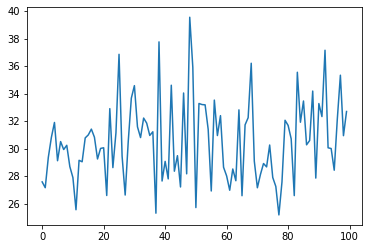

In [55]:
# index가 x축으로 보낸 후, Line plot
# => 아무런 정보가 없는 쓰레기 plot
Temperature_SR.plot()

<AxesSubplot:ylabel='Density'>

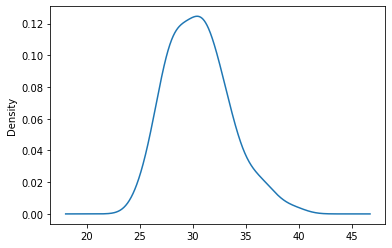

In [56]:
# Density plot
Temperature_SR.plot.density()

In [58]:
# 평균
Temperature_SR.mean()

30.53215259259658

In [60]:
# 표준편차
Temperature_SR.std()

2.932037388990244